In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import json
import numpy as np
import time
from PIL import Image, ImageDraw

%matplotlib inline
import matplotlib.pyplot as plt
import cv2

from coco_vis_utils import *

In [3]:
def generate_bbox(img_ann):
    tmp_bbox = []
    for aa in img_ann:
        tbox = aa['bbox']
        tmpbox = [round(x) for x in tbox]
        #print(tmpbox)
        tmp_bbox.append(tmpbox)
        
    return tmp_bbox

# Create the Training and Validation Datasets
Make sure you download the training dataset linked at the top of this notebook. If you put the dataset somewhere else, update the paths below.

In [4]:
DATASET_ROOT = "/mnt/mxrblob/users/phhale/csiro_trashnet/original_samples/"
#os.listdir(DATASET_ROOT)

In [5]:
dataset_train = CocoLikeDataset()
dataset_train.load_data(os.path.join(DATASET_ROOT, 'Subset_Trashnet/subset_Trashnet.json'),
                        os.path.join(DATASET_ROOT, 'Subset_Trashnet'))
dataset_train.prepare()

In [8]:
# Load and display random samples
num_samples = 10
image_ids = np.random.choice(dataset_train.image_ids, num_samples)

img_info = []
for image_id in image_ids:
    img_info.append(dataset_train.__dict__['image_info'][image_id])
    
#print(image_pathss)
print(image_ids)

[113  84 200 190 104   3 169  47 118  99]


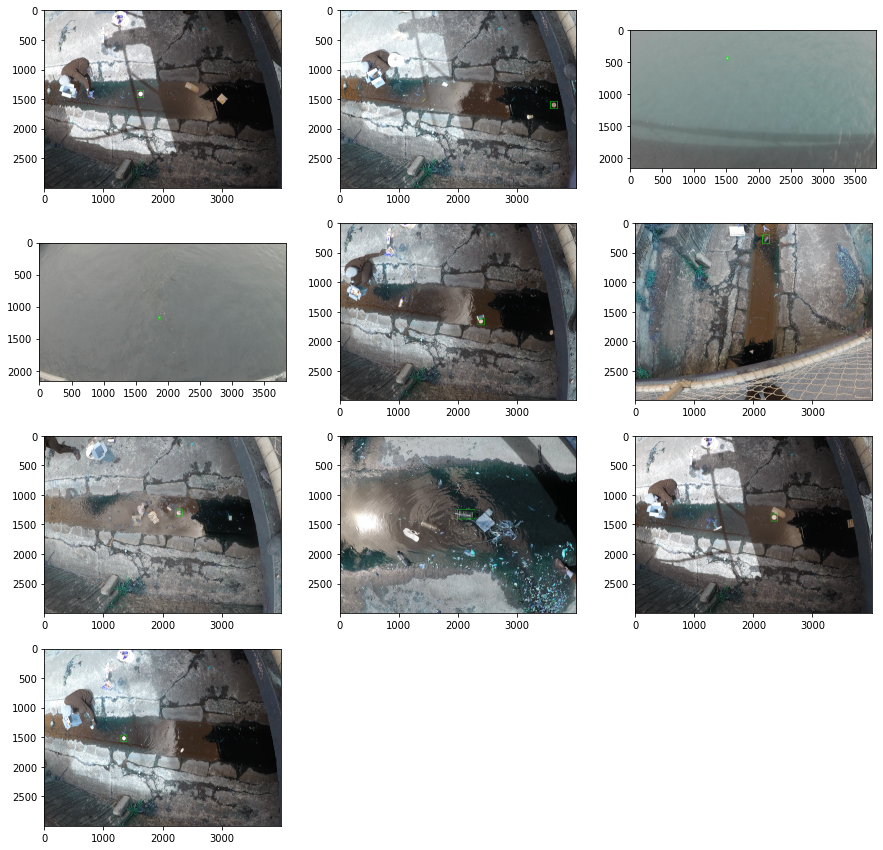

In [9]:
plt.figure(figsize=(15, 15))
#for i in range(len(image_pathss)):
for i in range(len(img_info)):
    plt.subplot(4, 3, i+1)
    img = cv2.imread(img_info[i]['path'])
    tmp_bbox = generate_bbox(img_info[i]['annotations'])
    [cv2.rectangle(img,(x, y), (x + w, y + h), (0,255,0), thickness=5) for x, y, w, h in tmp_bbox]   # draw a rectangle.
    plt.imshow(img)

In [ ]:
# Load and display random samples
#image_ids = np.random.choice(dataset.image_ids, 4)
num_samples = 10
image_ids = np.random.choice(dataset_train.image_ids, num_samples)

img_info = []
for image_id in image_ids:
    img_info.append(dataset_train.__dict__['image_info'][image_id])
    
#print(image_pathss)
print(image_ids)

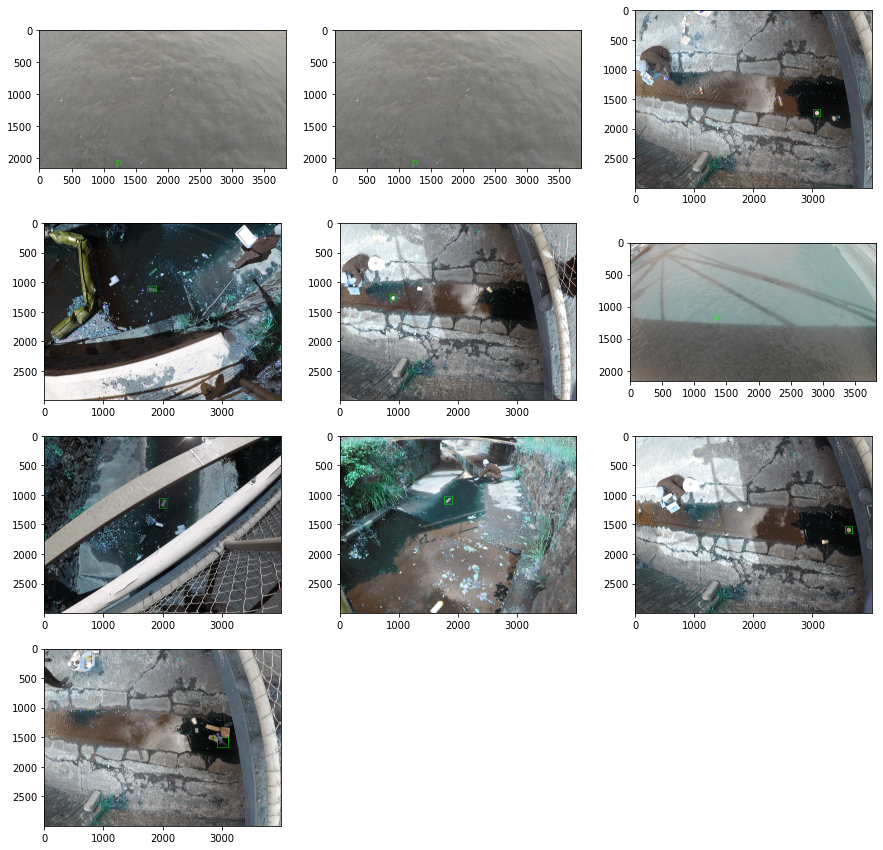

In [35]:
plt.figure(figsize=(15, 15))
for i in range(len(img_info)):
    plt.subplot(4, 3, i+1)
    img = cv2.imread(img_info[i]['path'])
    tmp_bbox = generate_bbox(img_info[i]['annotations'])
    [cv2.rectangle(img,(x, y), (x + w, y + h), (0,255,0), thickness=5) for x, y, w, h in tmp_bbox]   # draw a rectangle.
    plt.imshow(img)

In [10]:
num_samples = 10
image_ids = np.random.choice(dataset_train.image_ids, num_samples)
img_info = []
for image_id in image_ids:
    img_info.append(dataset_train.__dict__['image_info'][image_id])
    
#print(image_pathss)
print(image_ids)

[147  12  40 147  58 164 160 155  14  13]


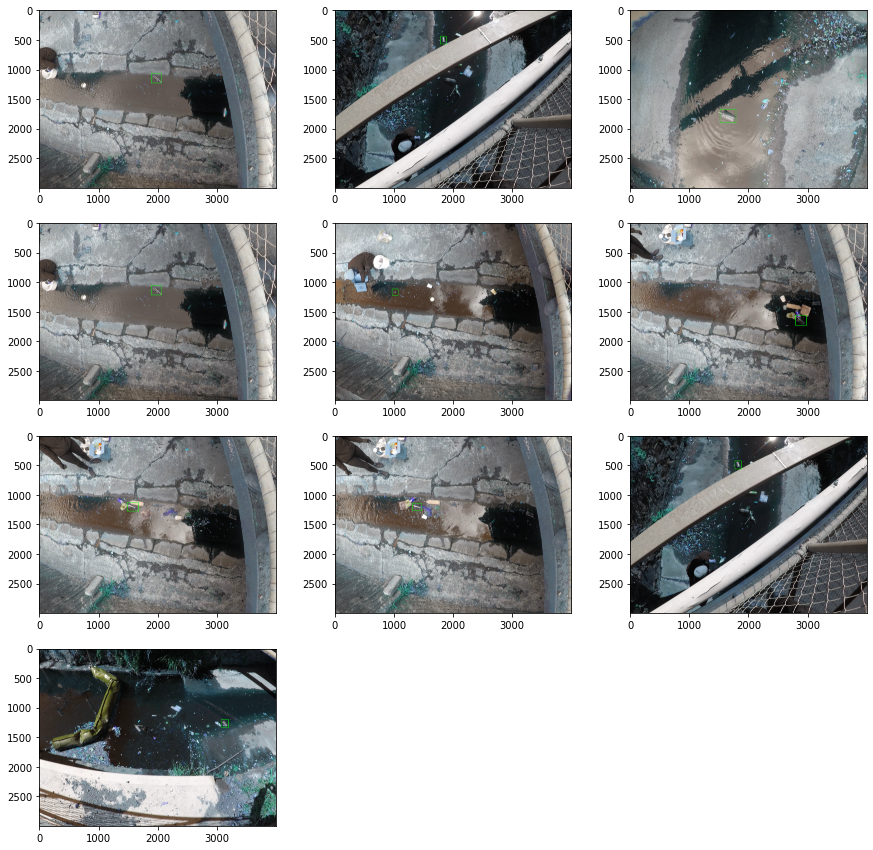

In [11]:
plt.figure(figsize=(15, 15))
for i in range(len(img_info)):
    plt.subplot(4, 3, i+1)
    img = cv2.imread(img_info[i]['path'])
    tmp_bbox = generate_bbox(img_info[i]['annotations'])
    [cv2.rectangle(img,(x, y), (x + w, y + h), (0,255,0), thickness=5) for x, y, w, h in tmp_bbox]   # draw a rectangle.
    plt.imshow(img)